In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load the dataset
file_path = "semeion.data"
data = pd.read_csv(file_path, delim_whitespace=True, header=None)

# Separate features (X) and labels (y)
X = data.iloc[:, :256].values
y = data.iloc[:, 256:].values

# Convert one-hot labels to integer labels
y = np.argmax(y, axis=1)

# Reshape X to 16x16 for CNN input and normalize to [0, 1]
X = X.reshape(-1, 16, 16, 1).astype('float32') / 1.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


<ipython-input-1-a1af8bc4cde6>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(16, 16, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20, batch_size=32)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3159 - loss: 2.0103 - val_accuracy: 0.7994 - val_loss: 0.7786
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7095 - loss: 0.8946 - val_accuracy: 0.9091 - val_loss: 0.3492
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8232 - loss: 0.5329 - val_accuracy: 0.9216 - val_loss: 0.2422
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8840 - loss: 0.3616 - val_accuracy: 0.9310 - val_loss: 0.2174
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9235 - loss: 0.2492 - val_accuracy: 0.9436 - val_loss: 0.1615
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9461 - loss: 0.1993 - val_accuracy: 0.9592 - val_loss: 0.1323
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9418 - loss: 0.1919 - val_accuracy: 0.9530 - val_loss: 0.1227
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9379 - loss: 0.1641 - val_accuracy: 0.9624 - val_loss: 0.

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9591 - loss: 0.1111
Test Accuracy: 96.24%


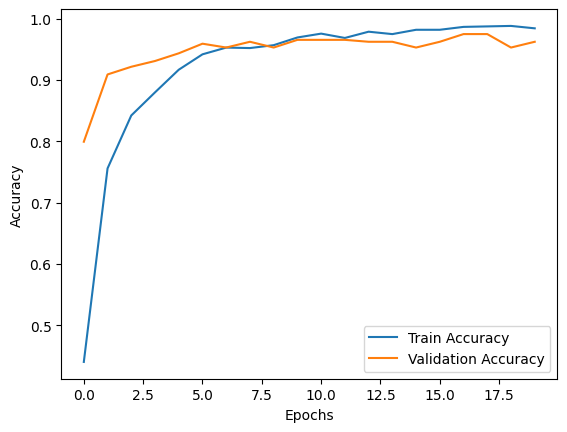

In [3]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot training and validation loss/accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
